In [1]:
!nvidia-smi

Mon Dec 12 12:43:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 526.98       Driver Version: 526.98       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   40C    P8    16W /  N/A |      0MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [3]:
df = pd.read_csv('IMDB_Dataset.csv')

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df['review'] = df['review'].astype(str)

In [7]:
reviews = df['review']

In [8]:
reviews

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [9]:
import re
import string

def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

reviews = reviews.apply(lambda i: remove_tags(i))

In [10]:
reviews

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. The filming tec...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [11]:
reviews = reviews.str.replace(r'[^\w\d\s]', ' ',regex=True)

In [12]:
reviews = reviews.str.replace(r'\s+', ' ',regex=True)

In [13]:
reviews = reviews.str.replace(r'^\s+|\s+?$', '',regex=True)

In [14]:
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words("english")
reviews =reviews.apply(lambda x: ' '.join(word for word in x.split() if word not in stopwords))
reviews

0        One reviewers mentioned watching 1 Oz episode ...
1        A wonderful little production The filming tech...
2        I thought wonderful way spend time hot summer ...
3        Basically family little boy Jake thinks zombie...
4        Petter Mattei Love Time Money visually stunnin...
                               ...                        
49995    I thought movie right good job It creative ori...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    I Catholic taught parochial elementary schools...
49998    I going disagree previous comment side Maltin ...
49999    No one expects Star Trek movies high art fans ...
Name: review, Length: 50000, dtype: object

In [15]:
reviews = reviews.str.lower()
reviews

0        one reviewers mentioned watching 1 oz episode ...
1        a wonderful little production the filming tech...
2        i thought wonderful way spend time hot summer ...
3        basically family little boy jake thinks zombie...
4        petter mattei love time money visually stunnin...
                               ...                        
49995    i thought movie right good job it creative ori...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i catholic taught parochial elementary schools...
49998    i going disagree previous comment side maltin ...
49999    no one expects star trek movies high art fans ...
Name: review, Length: 50000, dtype: object

In [16]:
'''from nltk.stem import PorterStemmer

p_stemmer = nltk.PorterStemmer()
reviews = reviews.apply(lambda x: ' '.join(p_stemmer.stem(word) for word in x.split()))

reviews'''

"from nltk.stem import PorterStemmer\n\np_stemmer = nltk.PorterStemmer()\nreviews = reviews.apply(lambda x: ' '.join(p_stemmer.stem(word) for word in x.split()))\n\nreviews"

In [17]:
from nltk.stem import WordNetLemmatizer

wn_lemmatizer = WordNetLemmatizer()
reviews = reviews.apply(lambda x: ' '.join(wn_lemmatizer.lemmatize(word) for word in x.split()))

reviews

0        one reviewer mentioned watching 1 oz episode h...
1        a wonderful little production the filming tech...
2        i thought wonderful way spend time hot summer ...
3        basically family little boy jake think zombie ...
4        petter mattei love time money visually stunnin...
                               ...                        
49995    i thought movie right good job it creative ori...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i catholic taught parochial elementary school ...
49998    i going disagree previous comment side maltin ...
49999    no one expects star trek movie high art fan ex...
Name: review, Length: 50000, dtype: object

In [18]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.probability import FreqDist

tokenize_words = []

for review in reviews:
    words = word_tokenize(review)
    for word in words:
        tokenize_words.append(word)
        
print(tokenize_words[:10],'\n')

word_freq = FreqDist(tokenize_words)
word_freq

['one', 'reviewer', 'mentioned', 'watching', '1', 'oz', 'episode', 'hooked', 'they', 'right'] 



FreqDist({'i': 164405, 'movie': 103235, 'film': 93424, 'the': 92816, 'one': 55431, 'like': 41120, 'it': 37997, 'time': 31453, 'this': 29964, 'good': 29852, ...})

In [19]:
reviews

0        one reviewer mentioned watching 1 oz episode h...
1        a wonderful little production the filming tech...
2        i thought wonderful way spend time hot summer ...
3        basically family little boy jake think zombie ...
4        petter mattei love time money visually stunnin...
                               ...                        
49995    i thought movie right good job it creative ori...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i catholic taught parochial elementary school ...
49998    i going disagree previous comment side maltin ...
49999    no one expects star trek movie high art fan ex...
Name: review, Length: 50000, dtype: object

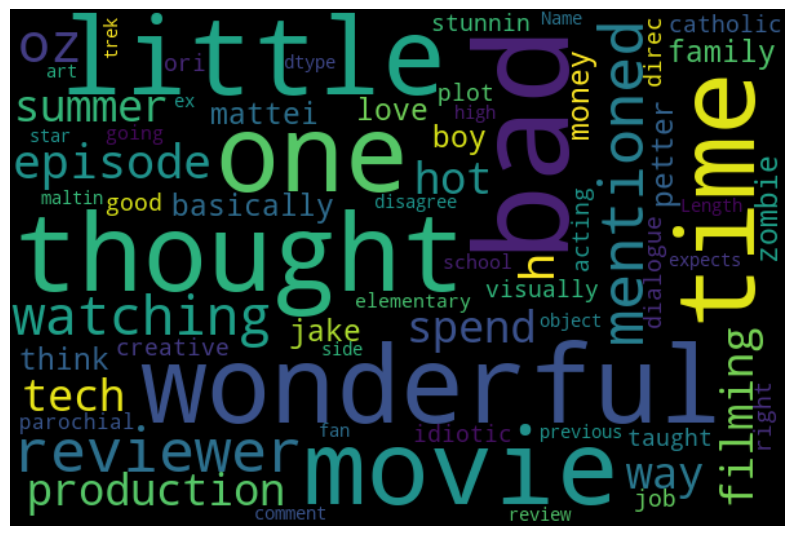

In [20]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(str(reviews))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(binary=False,ngram_range=(2,3),max_features=20000)

x = count_vec.fit_transform(reviews).toarray()


In [22]:
x.shape

(50000, 20000)

In [23]:
x.dtype

dtype('int64')

In [24]:
count_vec_x = x.astype(np.int8)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid_vec = TfidfVectorizer(binary=False,ngram_range=(2,3),max_features=20000)

tfid_x = tfid_vec.fit_transform(reviews).toarray()

In [26]:
sentiment = pd.get_dummies(df,columns=['sentiment'])
sentiment

,review,sentiment_negative,sentiment_positive
0,One of the other reviewers has mentioned that ...,0,1
1,A wonderful little production. <br /><br />The...,0,1
2,I thought this was a wonderful way to spend ti...,0,1
3,Basically there's a family where a little boy ...,1,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",0,1
...,...,...,...
49995,I thought this movie did a down right good job...,0,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",1,0
49997,I am a Catholic taught in parochial elementary...,1,0
49998,I'm going to have to disagree with the previou...,1,0


In [27]:
sentiment.drop(['review','sentiment_negative'],axis = 1,inplace=True)

In [28]:
sentiment.rename(columns = {'sentiment_positive':'sentiment'}, inplace = True)

In [29]:
sentiment = np.squeeze(sentiment)

In [30]:
sentiment.shape

(50000,)

In [31]:
#sentiment_test_set = sentiment_test_set.iloc[:,-1:].values.flatten()

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(count_vec_x, sentiment, test_size = 0.20, random_state = 7)

In [33]:
'''from sklearn.ensemble import  AdaBoostClassifier

ada_classifier = AdaBoostClassifier()
ada_classifier.fit(x_train,y_train)'''

'from sklearn.ensemble import  AdaBoostClassifier\n\nada_classifier = AdaBoostClassifier()\nada_classifier.fit(x_train,y_train)'

In [34]:
'''print(f'Train score:{format(ada_classifier.score(x_train,y_train))}',end ='\n\n')
print(f'Test score:{format(ada_classifier.score(x_test,y_test))}',end = '\n\n')'''

"print(f'Train score:{format(ada_classifier.score(x_train,y_train))}',end ='\n\n')\nprint(f'Test score:{format(ada_classifier.score(x_test,y_test))}',end = '\n\n')"

In [35]:
'''import scikitplot as skplt

skplt.estimators.plot_learning_curve(ada_classifier,x_train,y_train,title="AdaBoostClassifier Learning Curve",
                                     scoring="f1",cv=5,shuffle=True,random_state=42,n_jobs=-1,figsize=(10, 8))'''

'import scikitplot as skplt\n\nskplt.estimators.plot_learning_curve(ada_classifier,x_train,y_train,title="AdaBoostClassifier Learning Curve",\n                                     scoring="f1",cv=5,shuffle=True,random_state=42,n_jobs=-1,figsize=(10, 8))'

In [36]:
from sklearn.linear_model import  SGDClassifier

sgdclsssifier_model = SGDClassifier(loss='hinge',penalty='l2', alpha=0.001,
                                    l1_ratio=0.15, fit_intercept=True, max_iter=20000,
                                    tol=0.001, shuffle=True, verbose=0, epsilon=0.001, 
                                    n_jobs=None, random_state=7, learning_rate='optimal', 
                                    eta0=0.0, power_t=0.5, early_stopping=False,
                                    validation_fraction=0.1, n_iter_no_change=5,
                                    class_weight=None, warm_start=False, average=False)

sgdclsssifier_model.fit(x_train,y_train)

SGDClassifier(alpha=0.001, epsilon=0.001, max_iter=20000, random_state=7)

In [37]:
print(f'Train score:{format(sgdclsssifier_model.score(x_train,y_train))}',end ='\n\n')
print(f'Test score:{format(sgdclsssifier_model.score(x_test,y_test))}',end = '\n\n')

Train score:0.9217

Test score:0.8548

